<a href="https://colab.research.google.com/github/MrWalu/traffic_sign_classification/blob/main/psi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib
import os
import cv2
import sklearn.model_selection as ms
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import files
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/PSI/Meta.csv")
test.shape

(43, 5)

In [ ]:
test2 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/PSI/Test.csv")
test2.shape

(12630, 8)

In [ ]:
test3 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/PSI/Train.csv")
test3.shape

(39209, 8)

In [ ]:
height = 30
width = 30
channels = 3
types = 43

In [ ]:
data_dir = '/content/drive/MyDrive/ColabNotebooks/PSI'
train_path = '/content/drive/MyDrive/ColabNotebooks/PSI/Train'
test_path = '/content/drive/MyDrive/ColabNotebooks/PSI'

In [ ]:
def load_data(data_dir):
   
    images = list()
    labels = list()
    for category in range(types):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

**Architecture 1**

In [ ]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.2)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255 
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (31378, 30, 30, 3)
X_test.shape (7845, 30, 30, 3)
y_train.shape (31378, 43)
y_test.shape (7845, 43)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[height, width, channels]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=types, activation='relu'))
model.add(tf.keras.layers.Dense(types, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50,
                    batch_size=32)

Epoch 1/50
981/981 [==============================] - 92s 93ms/step - loss: 1.8064 - accuracy: 0.4928 - val_loss: 0.5626 - val_accuracy: 0.8395
Epoch 2/50
981/981 [==============================] - 87s 89ms/step - loss: 0.4429 - accuracy: 0.8595 - val_loss: 0.2009 - val_accuracy: 0.9407
Epoch 3/50
981/981 [==============================] - 85s 87ms/step - loss: 0.2829 - accuracy: 0.9105 - val_loss: 0.0804 - val_accuracy: 0.9759
Epoch 4/50
981/981 [==============================] - 87s 89ms/step - loss: 0.2177 - accuracy: 0.9314 - val_loss: 0.0663 - val_accuracy: 0.9823
Epoch 5/50
981/981 [==============================] - 86s 88ms/step - loss: 0.1867 - accuracy: 0.9406 - val_loss: 0.0495 - val_accuracy: 0.9833
Epoch 6/50
981/981 [==============================] - 85s 87ms/step - loss: 0.1599 - accuracy: 0.9501 - val_loss: 0.0724 - val_accuracy: 0.9786
Epoch 7/50
981/981 [==============================] - 87s 88ms/step - loss: 0.1481 - accuracy: 0.9531 - val_loss: 0.0440 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('test set accuracy: ', accuracy * 100)

246/246 [==============================] - 6s 26ms/step - loss: 0.0127 - accuracy: 0.9958
test set accuracy:  99.57935214042664


In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  75.67695961995248


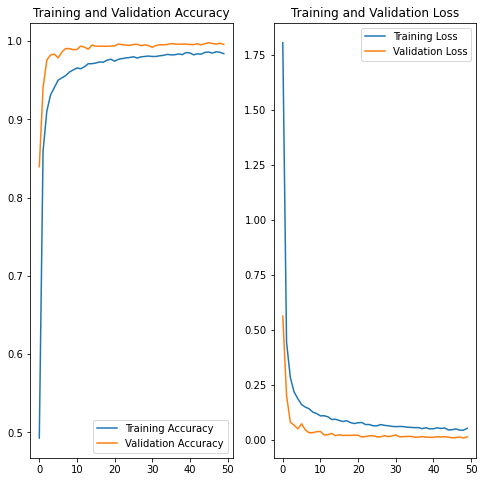

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Architecture 2** 

In [ ]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255 
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (23533, 30, 30, 3)
X_test.shape (15690, 30, 30, 3)
y_train.shape (23533, 43)
y_test.shape (15690, 43)


In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[height, width, channels]))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2,2))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2,2))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=types, activation='relu'))
model2.add(tf.keras.layers.Dense(types, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 32)       

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30,
                    batch_size=32)

Epoch 1/30
736/736 [==============================] - 70s 93ms/step - loss: 2.4441 - accuracy: 0.3232 - val_loss: 1.4376 - val_accuracy: 0.5975
Epoch 2/30
736/736 [==============================] - 65s 89ms/step - loss: 1.0686 - accuracy: 0.6637 - val_loss: 0.4823 - val_accuracy: 0.8634
Epoch 3/30
736/736 [==============================] - 68s 92ms/step - loss: 0.6708 - accuracy: 0.7879 - val_loss: 0.2921 - val_accuracy: 0.9198
Epoch 4/30
736/736 [==============================] - 66s 90ms/step - loss: 0.5076 - accuracy: 0.8377 - val_loss: 0.1819 - val_accuracy: 0.9460
Epoch 5/30
736/736 [==============================] - 66s 90ms/step - loss: 0.4251 - accuracy: 0.8635 - val_loss: 0.2118 - val_accuracy: 0.9410
Epoch 6/30
736/736 [==============================] - 64s 87ms/step - loss: 0.3821 - accuracy: 0.8777 - val_loss: 0.1067 - val_accuracy: 0.9707
Epoch 7/30
736/736 [==============================] - 64s 87ms/step - loss: 0.3421 - accuracy: 0.8894 - val_loss: 0.1320 - val_accuracy:

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 10s 20ms/step - loss: 0.0352 - accuracy: 0.9890
test set accuracy:  98.90376329421997


In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model2.predict(X_test), axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model2.save("model.h5")